In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [145]:
# Detect the encoding
with open('ECOMM_DATA.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the CSV file
df = pd.read_csv('ECOMM_DATA.csv', encoding=result['encoding'])

In [146]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [148]:
df = df.drop(columns=['Row ID','Order ID','Ship Date','Customer ID','Customer Name','City','State','Postal Code','Product ID','Product Name'])
df

,Order Date,Ship Mode,Segment,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,05-02-2013,Second Class,Corporate,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,17-10-2013,First Class,Consumer,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,28-01-2013,First Class,Home Office,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,05-11-2013,Same Day,Consumer,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,19-06-2014,Same Day,Corporate,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01,Medium
51286,20-06-2014,Standard Class,Consumer,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01,Medium
51287,02-12-2013,Same Day,Home Office,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01,High
51288,18-02-2012,Standard Class,Home Office,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00,Medium


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Mode       51290 non-null  object 
 2   Segment         51290 non-null  object 
 3   Country         51290 non-null  object 
 4   Market          51290 non-null  object 
 5   Region          51290 non-null  object 
 6   Category        51290 non-null  object 
 7   Sub-Category    51290 non-null  object 
 8   Sales           51290 non-null  float64
 9   Quantity        51290 non-null  int64  
 10  Discount        51290 non-null  float64
 11  Profit          51290 non-null  float64
 12  Shipping Cost   51290 non-null  float64
 13  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.5+ MB


In [150]:
df.duplicated().sum()

1

In [151]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [152]:
df.reset_index(inplace=True, drop=True)
df

,Order Date,Ship Mode,Segment,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,05-02-2013,Second Class,Corporate,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,17-10-2013,First Class,Consumer,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,28-01-2013,First Class,Home Office,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,05-11-2013,Same Day,Consumer,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,19-06-2014,Same Day,Corporate,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01,Medium
51285,20-06-2014,Standard Class,Consumer,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01,Medium
51286,02-12-2013,Same Day,Home Office,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01,High
51287,18-02-2012,Standard Class,Home Office,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00,Medium


In [153]:
df['Order Date'] = df['Order Date'].str.split('-').str[2]
df

,Order Date,Ship Mode,Segment,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012,Same Day,Consumer,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,2013,Second Class,Corporate,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,2013,First Class,Consumer,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,2013,First Class,Home Office,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,2013,Same Day,Consumer,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,2014,Same Day,Corporate,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01,Medium
51285,2014,Standard Class,Consumer,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01,Medium
51286,2013,Same Day,Home Office,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01,High
51287,2012,Standard Class,Home Office,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00,Medium


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51289 entries, 0 to 51288
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51289 non-null  object 
 1   Ship Mode       51289 non-null  object 
 2   Segment         51289 non-null  object 
 3   Country         51289 non-null  object 
 4   Market          51289 non-null  object 
 5   Region          51289 non-null  object 
 6   Category        51289 non-null  object 
 7   Sub-Category    51289 non-null  object 
 8   Sales           51289 non-null  float64
 9   Quantity        51289 non-null  int64  
 10  Discount        51289 non-null  float64
 11  Profit          51289 non-null  float64
 12  Shipping Cost   51289 non-null  float64
 13  Order Priority  51289 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.5+ MB


In [155]:
df['Order Date'] = df['Order Date'].astype(int)

In [156]:
df = df.rename(columns={'Order Date': 'Year'})

In [157]:
df = df.rename(columns={'Sales': 'Revenue'})

In [158]:
df['Year'].value_counts()

2014    17530
2013    13799
2012    10962
2011     8998
Name: Year, dtype: int64

In [159]:
df['Ship Mode'].value_counts()

Standard Class    30774
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [160]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9342
Name: Segment, dtype: int64

In [161]:
df['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Bahrain             2
South Sudan         2
Chad                2
Burundi             2
Eritrea             2
Name: Country, Length: 147, dtype: int64

In [162]:
df['Market'].value_counts()

APAC      11002
LATAM     10293
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [163]:
df['Region'].value_counts()

Central           11117
South              6644
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [164]:
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9875
Name: Category, dtype: int64

In [165]:
df['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3169
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [166]:
df['Quantity'].value_counts()

2     12748
3      9681
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: Quantity, dtype: int64

In [167]:
df['Order Priority'].value_counts()

Medium      29432
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [177]:
grouped_data= df.groupby('Year')['Revenue'].sum().reset_index()
grouped_data

,Year,Revenue
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299851e+06


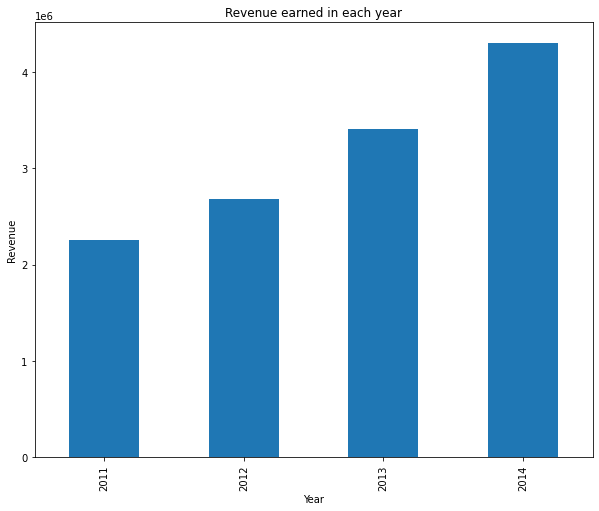

In [178]:
grouped_data.plot(kind='bar', x='Year', y='Revenue', legend=False, figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue earned in each year')
plt.show()

In [179]:
grouped_data = df.groupby('Year')['Profit'].sum().reset_index()
grouped_data

,Year,Profit
0,2011,248940.81154
1,2012,307415.27910
2,2013,406935.23018
3,2014,504188.39846


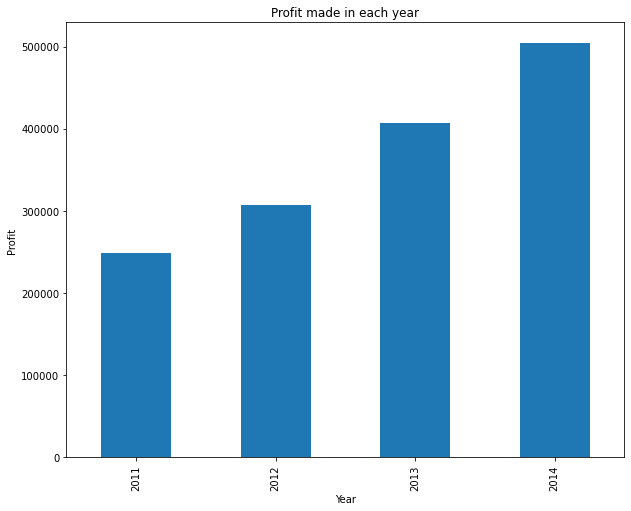

In [180]:
grouped_data.plot(kind='bar', x='Year', y='Profit', legend=False, figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit made in each year')
plt.show()

In [181]:
grouped_data = df.groupby('Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
grouped_data

,Category,Revenue
2,Technology,4.744557e+06
0,Furniture,4.110859e+06
1,Office Supplies,3.787070e+06


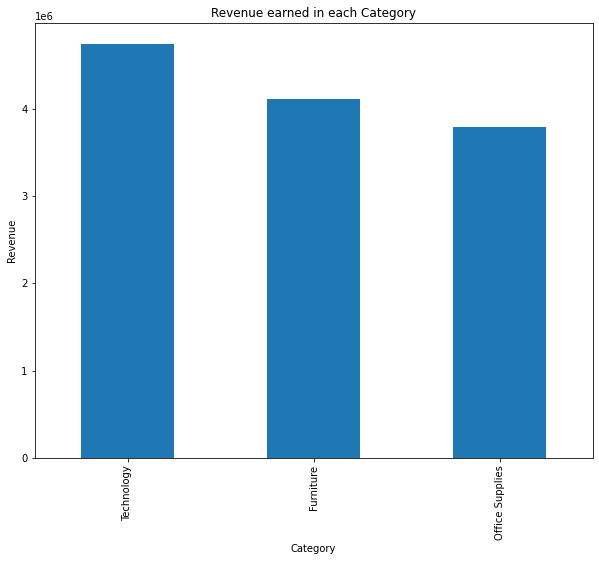

In [182]:
grouped_data.plot(kind='bar', x='Category', y='Revenue', legend=False, figsize=(10,8))
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue earned in each Category')
plt.show()

In [183]:
grouped_data = df.groupby('Sub-Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
grouped_data

,Sub-Category,Revenue
13,Phones,1.706824e+06
6,Copiers,1.509436e+06
5,Chairs,1.501682e+06
4,Bookcases,1.466572e+06
14,Storage,1.127086e+06
1,Appliances,1.011064e+06
11,Machines,7.790601e+05
16,Tables,7.570419e+05
0,Accessories,7.492370e+05
3,Binders,4.619115e+05


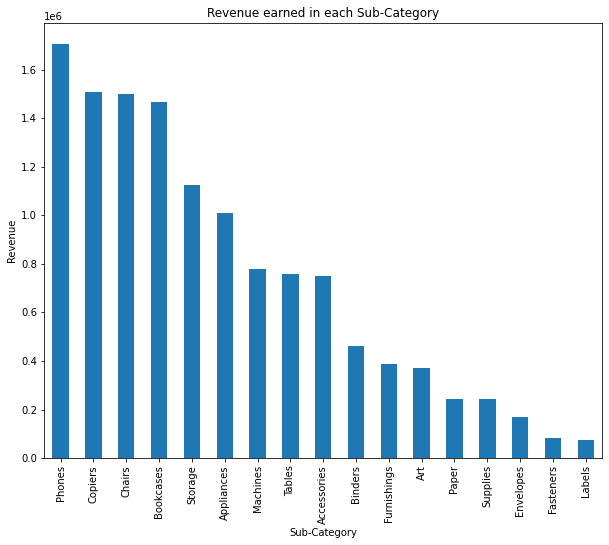

In [184]:
grouped_data.plot(kind='bar', x='Sub-Category', y='Revenue', legend=False, figsize=(10,8))
plt.xlabel('Sub-Category')
plt.ylabel('Revenue')
plt.title('Revenue earned in each Sub-Category')
plt.show()

In [185]:
grouped_data = df.groupby('Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
grouped_data

,Category,Quantity
1,Office Supplies,108182
2,Technology,35176
0,Furniture,34951


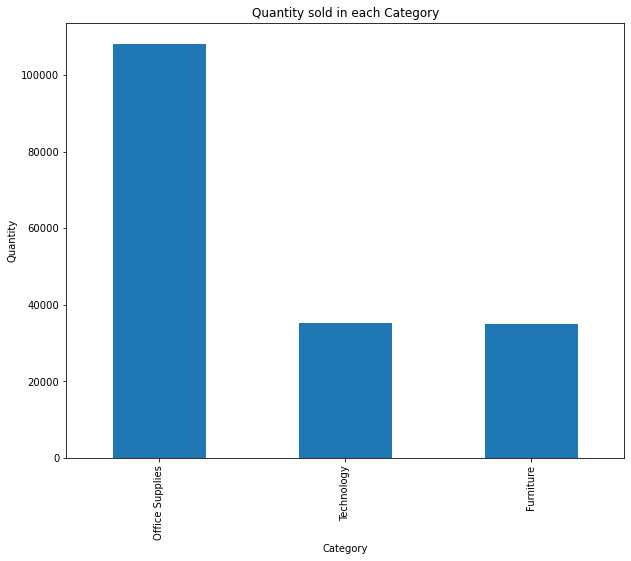

In [186]:
grouped_data.plot(kind='bar', x='Category', y='Quantity', legend=False, figsize=(10,8))
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity sold in each Category')
plt.show()

In [187]:
grouped_data = df.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
grouped_data

,Sub-Category,Quantity
3,Binders,21429
14,Storage,16917
2,Art,16301
12,Paper,12822
5,Chairs,12336
13,Phones,11870
9,Furnishings,11222
0,Accessories,10946
10,Labels,9322
15,Supplies,8543


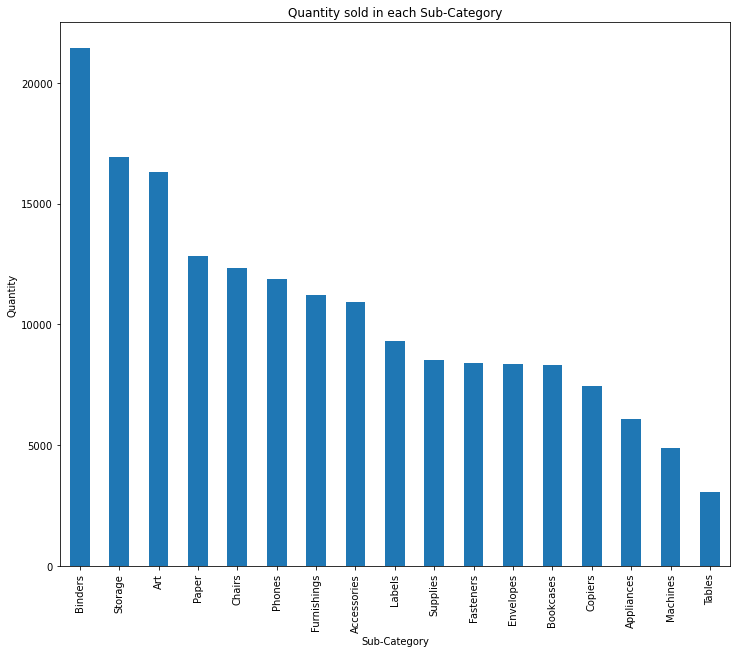

In [188]:
grouped_data.plot(kind='bar', x='Sub-Category', y='Quantity', legend=False, figsize=(12,10))
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.title('Quantity sold in each Sub-Category')
plt.show()

In [189]:
grouped_data = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
grouped_data

,Category,Profit
2,Technology,663778.73318
1,Office Supplies,518473.83430
0,Furniture,285227.15180


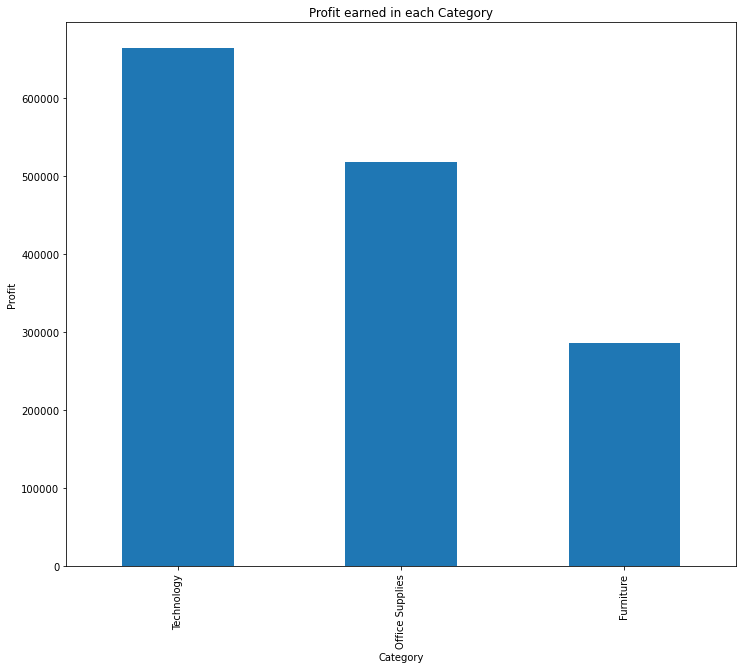

In [190]:
grouped_data.plot(kind='bar', x='Category', y='Profit', legend=False, figsize=(12,10))
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit earned in each Category')
plt.show()

In [191]:
grouped_data = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
grouped_data

,Sub-Category,Profit
6,Copiers,258567.54818
13,Phones,216717.00580
4,Bookcases,161924.41950
1,Appliances,141680.58940
5,Chairs,140396.26750
0,Accessories,129626.30620
14,Storage,108461.48980
3,Binders,72449.84600
12,Paper,59207.68270
11,Machines,58867.87300


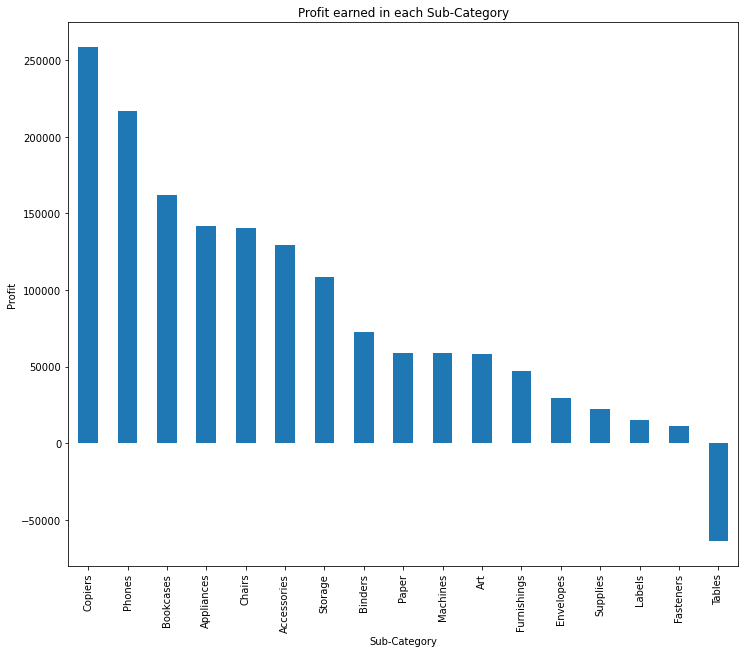

In [192]:
grouped_data.plot(kind='bar', x='Sub-Category', y='Profit', legend=False, figsize=(12,10))
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit earned in each Sub-Category')
plt.show()

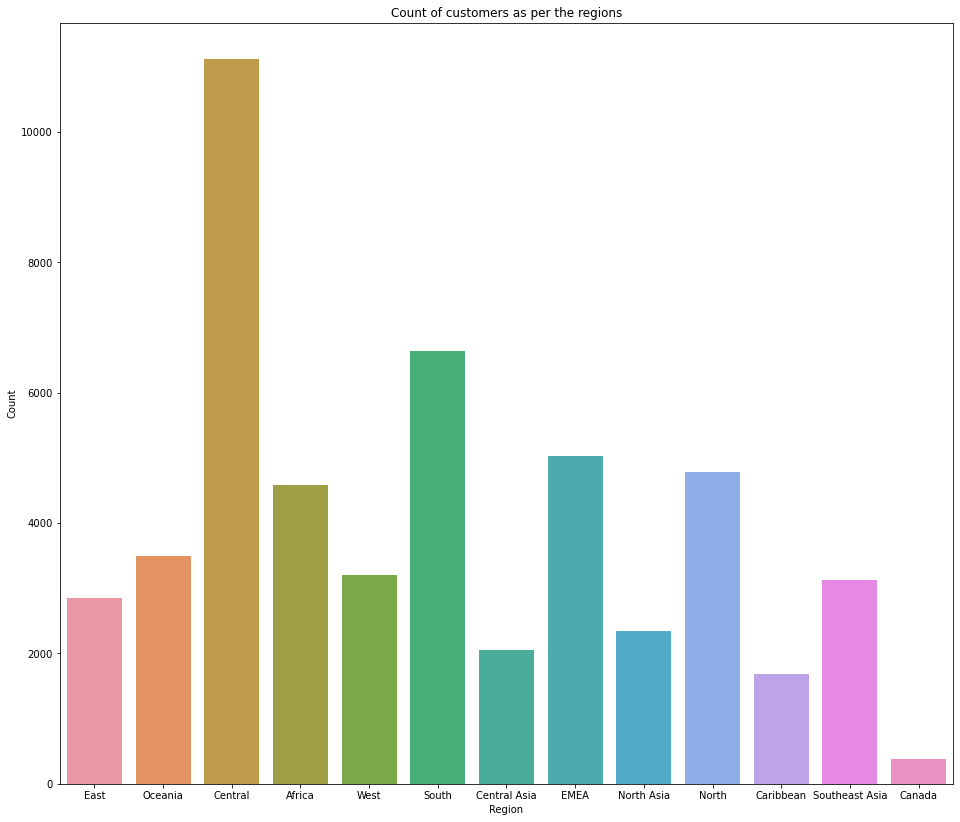

In [193]:
plt.figure(figsize=(16, 14))  
sns.countplot(data=df, x='Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of customers as per the regions')
plt.show()

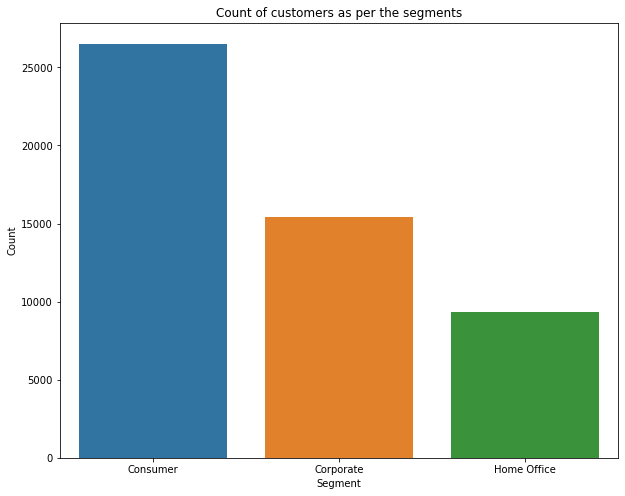

In [194]:
plt.figure(figsize=(10, 8))  
sns.countplot(data=df, x='Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Count of customers as per the segments')
plt.show()

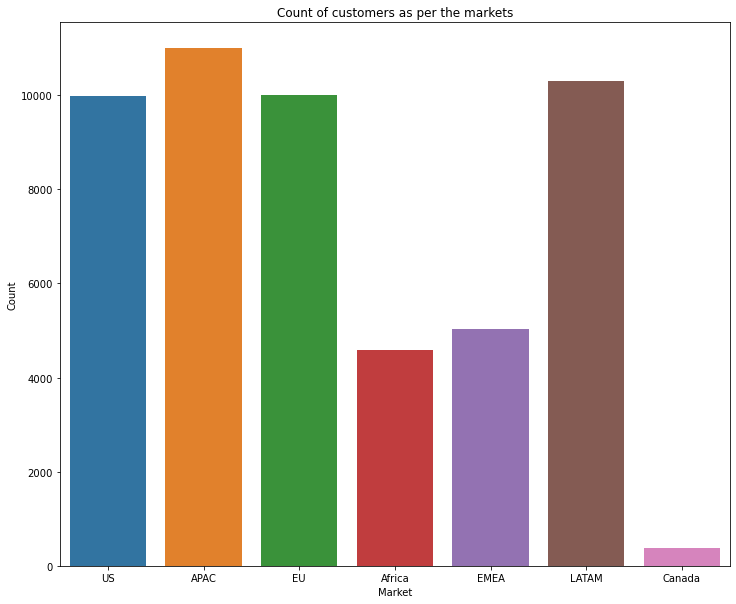

In [195]:
plt.figure(figsize=(12, 10))  
sns.countplot(data=df, x='Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Count of customers as per the markets')
plt.show()

In [196]:
grouped_data = df.groupby('Region')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
grouped_data

,Region,Revenue
3,Central,2.822303e+06
10,South,1.600892e+06
7,North,1.248166e+06
9,Oceania,1.100185e+06
11,Southeast Asia,8.844232e+05
8,North Asia,8.483098e+05
5,EMEA,8.061613e+05
0,Africa,7.837732e+05
4,Central Asia,7.528266e+05
12,West,7.254578e+05


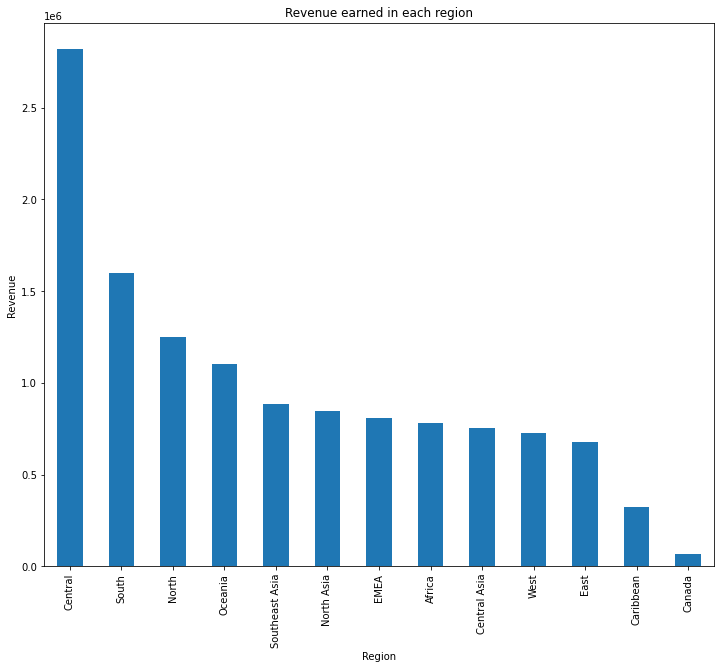

In [197]:
grouped_data.plot(kind='bar', x='Region', y='Revenue', legend=False, figsize=(12,10))
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('Revenue earned in each region')
plt.show()

In [198]:
grouped_data = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
grouped_data

,Region,Profit
3,Central,311403.98164
7,North,194597.95252
8,North Asia,165578.42100
10,South,140378.19418
4,Central Asia,132480.18700
9,Oceania,120089.11200
12,West,108418.44890
6,East,91522.78000
0,Africa,88871.63100
5,EMEA,43897.97100


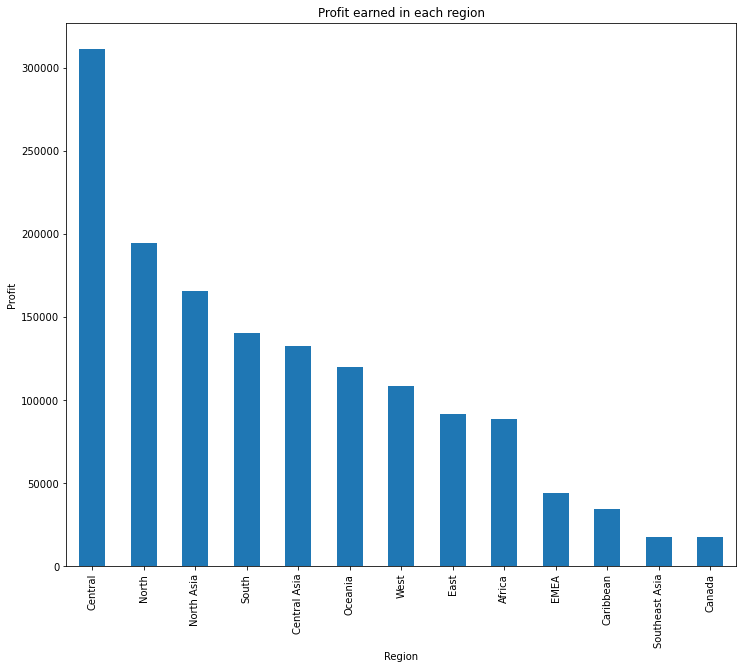

In [199]:
grouped_data.plot(kind='bar', x='Region', y='Profit', legend=False, figsize=(12,10))
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Profit earned in each region')
plt.show()

In [200]:
grouped_data = df.groupby('Market')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
grouped_data

,Market,Revenue
0,APAC,3.585744e+06
4,EU,2.938089e+06
6,US,2.297201e+06
5,LATAM,2.164590e+06
3,EMEA,8.061613e+05
1,Africa,7.837732e+05
2,Canada,6.692817e+04


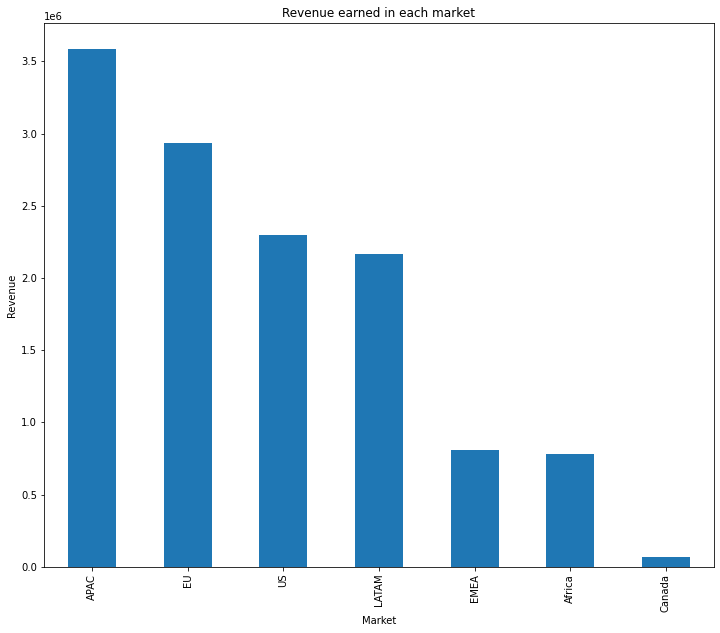

In [201]:
grouped_data.plot(kind='bar', x='Market', y='Revenue', legend=False, figsize=(12,10))
plt.xlabel('Market')
plt.ylabel('Revenue')
plt.title('Revenue earned in each market')
plt.show()

In [202]:
grouped_data = df.groupby('Market')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
grouped_data

,Market,Profit
0,APAC,436000.04900
4,EU,372829.74150
6,US,286397.02170
5,LATAM,221665.91508
1,Africa,88871.63100
3,EMEA,43897.97100
2,Canada,17817.39000


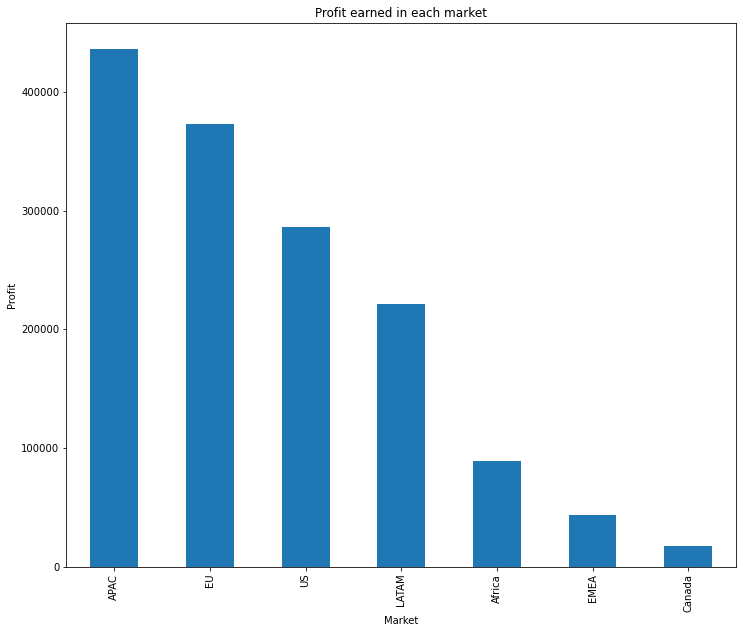

In [203]:
grouped_data.plot(kind='bar', x='Market', y='Profit', legend=False, figsize=(12,10))
plt.xlabel('Market')
plt.ylabel('Profit')
plt.title('Profit earned in each market')
plt.show()

In [204]:
grouped_data = df.groupby('Segment')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
grouped_data

,Segment,Revenue
0,Consumer,6.507949e+06
1,Corporate,3.824698e+06
2,Home Office,2.309840e+06


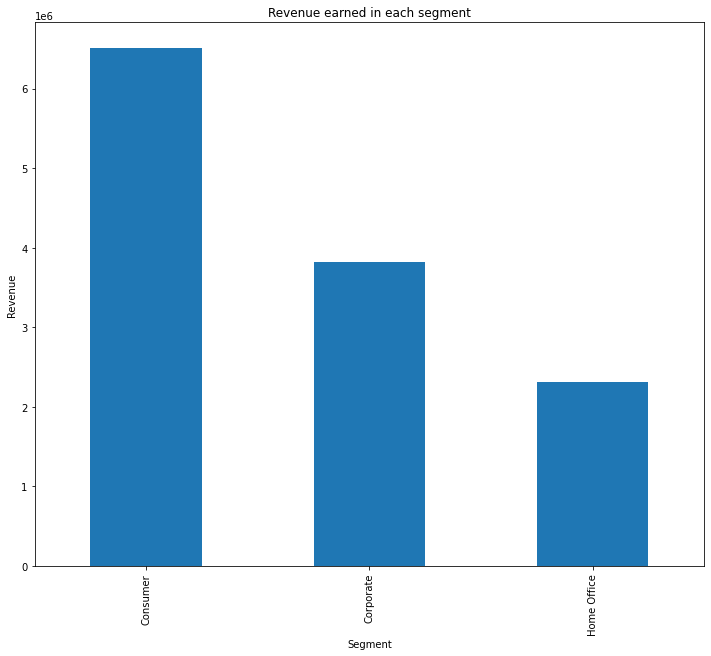

In [205]:
grouped_data.plot(kind='bar', x='Segment', y='Revenue', legend=False, figsize=(12,10))
plt.xlabel('Segment')
plt.ylabel('Revenue')
plt.title('Revenue earned in each segment')
plt.show()

In [206]:
grouped_data = df.groupby('Segment')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
grouped_data

,Segment,Profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277031.60856


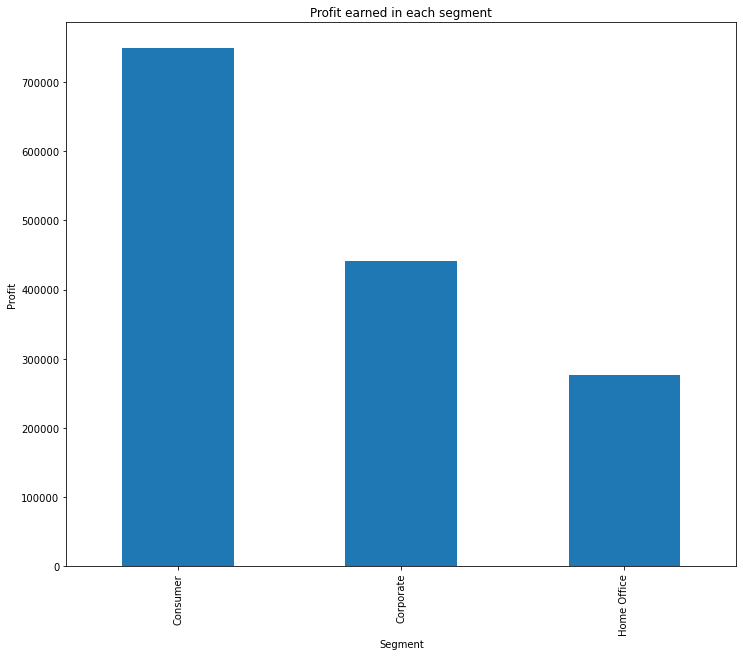

In [207]:
grouped_data.plot(kind='bar', x='Segment', y='Profit', legend=False, figsize=(12,10))
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit earned in each segment')
plt.show()